Selecting alternatives that would be suitable for a good clustering

In [1]:
from matplotlib import pyplot as plt
from utils.utils import *
import utils.promethee_functions as pf
import utils.clustering_functions as cf

utils.py Loading


# 1. Reading Data

In [2]:
data = read_data()

Reading HDI dataset
co2prod: min=0.0, max=33.3863
hdi: min=0.257, max=0.967
le: min=37.105, max=85.473
gdi: min=0.383, max=1.041
eys: min=3.5751, max=23.2477
mys: min=1.4606, max=14.2559


In [3]:
K = data.columns.shape[0] # Nb of criteria
L = data.iloc[0]["co2prod"].shape[0] # Length of the time series
N = data.shape[0] # Nb of alternatives

W = [1/K for i in range(K)] # Weights of the criteria (equal weights)
Q = [4, 0.3, 40,  0.4, 4, 2] # Indifference thresholds
P = [28, 0.9, 80, 1, 20, 12] # Preference thresholds

In [4]:
phi_c_all = pf.get_all_Phi_c(data, P, Q)

c:\Users\raphu\Documents\ULB\MA2\ulb-master-thesis\code\src\utils\promethee_functions.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d = a_i[c] - a_j[c]


In [5]:
PHI = pf.PHI_all(phi_c_all, W, N, L, K)

In [8]:
len(phi_c_all) #should be equal to K

6

In [6]:
PHI.shape

(72, 33)

# 2. Selecting samples for easy clustering

In [5]:
# Create a dataframe with PHI and the iso3 code
phi_df = pd.DataFrame(PHI)

phi_df["iso3"] = alternatives
# Set as index the iso3 code
phi_df.set_index("iso3", inplace=True)

# Split the data into groups of 10
phi_df = phi_df.sort_values(by=0, ascending=False)
indexes = phi_df.index
phi_df = phi_df.reset_index(drop=True)

phi_df["group"] = phi_df.index // 10

# Add the iso3 code to the dataframe
phi_df["iso3"] = indexes
phi_df.set_index("iso3", inplace=True)

phi_df

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,group
iso3,,,,,,,,,,,,,,,,,,,,,
CHE,0.367262,0.356570,0.350880,0.356757,0.346322,0.338212,0.337003,0.331838,0.327302,0.324650,...,0.383229,0.380729,0.386444,0.389489,0.397112,0.399804,0.388969,0.403423,0.403590,0
ISL,0.359162,0.384043,0.388292,0.364844,0.366343,0.336607,0.340699,0.353279,0.363970,0.340502,...,0.328196,0.316762,0.293413,0.296652,0.293358,0.264038,0.282258,0.294431,0.277508,0
JPN,0.347294,0.345961,0.339725,0.344298,0.343032,0.339105,0.339885,0.338187,0.328064,0.315506,...,0.177805,0.183552,0.174981,0.168206,0.170914,0.163098,0.162113,0.160993,0.162982,0
NOR,0.343349,0.360352,0.356096,0.347082,0.365901,0.348059,0.345526,0.340154,0.349284,0.342946,...,0.279955,0.284917,0.285023,0.292429,0.292730,0.294467,0.304965,0.311864,0.301845,0
NLD,0.339130,0.335393,0.317108,0.296605,0.345243,0.324248,0.317204,0.305473,0.282068,0.269185,...,0.223842,0.210151,0.193835,0.202152,0.199175,0.202850,0.215339,0.217421,0.220802,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAR,-0.352944,-0.353158,-0.353480,-0.353949,-0.353833,-0.341122,-0.339760,-0.337888,-0.331550,-0.327532,...,-0.247903,-0.239067,-0.228258,-0.214260,-0.201202,-0.191700,-0.182094,-0.162912,-0.138206,7
NPL,-0.356993,-0.346445,-0.346674,-0.339390,-0.333935,-0.331775,-0.322295,-0.321531,-0.314079,-0.316926,...,-0.255985,-0.259537,-0.260283,-0.265337,-0.266576,-0.259670,-0.262963,-0.254095,-0.247333,7
PAK,-0.403077,-0.392019,-0.394960,-0.397577,-0.399323,-0.407010,-0.404707,-0.405061,-0.454775,-0.399893,...,-0.367629,-0.369639,-0.381255,-0.384923,-0.380376,-0.372493,-0.365305,-0.363894,-0.365265,7


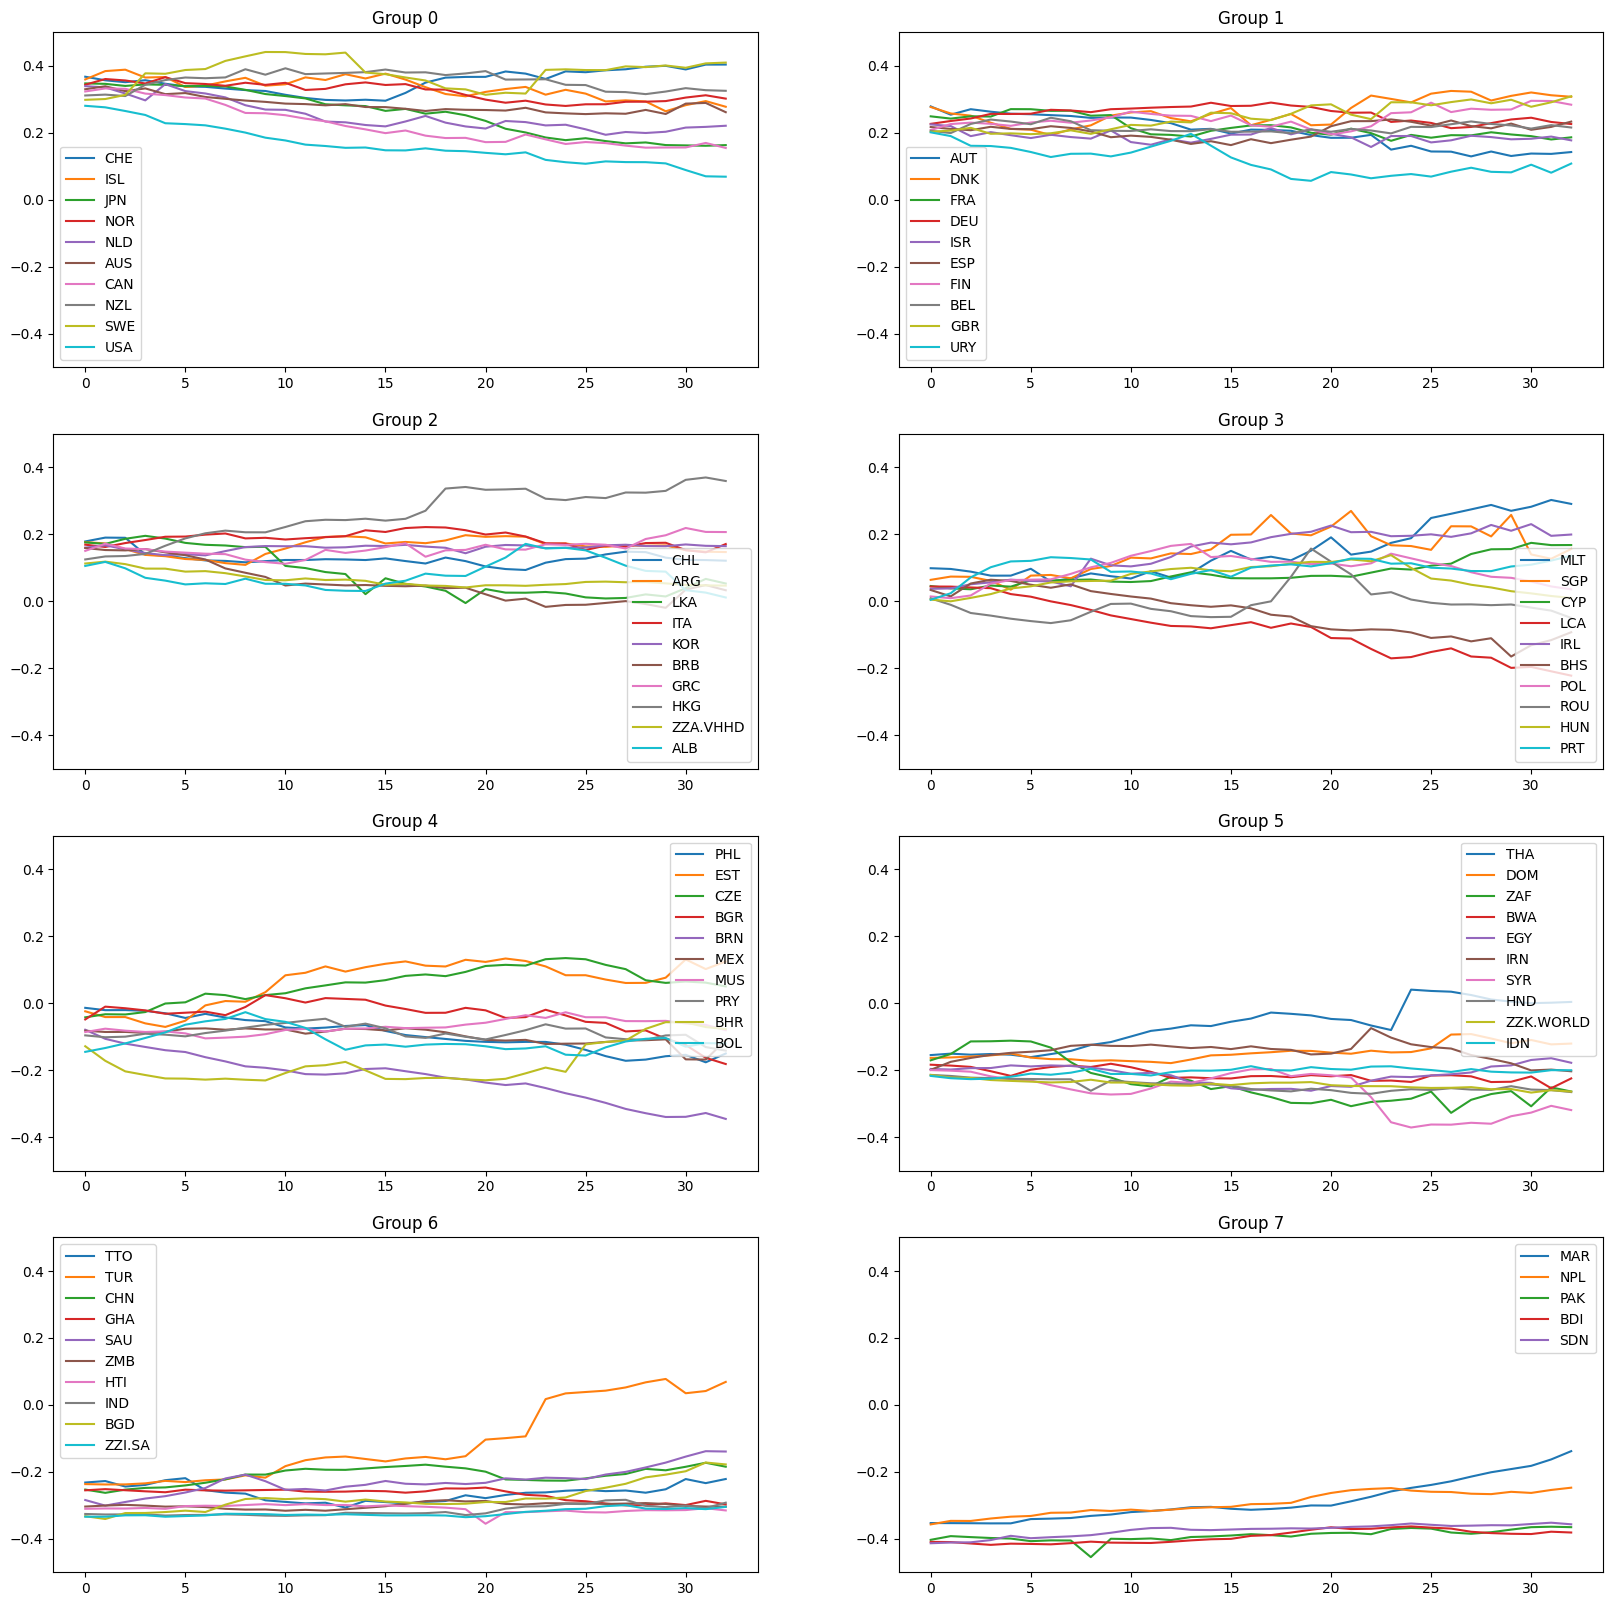

In [6]:
# plot each group on a different subplot
fig, axs = plt.subplots(4, 2, figsize=(20, 20))
for i in range(4):
    for j in range(2):
        group = phi_df[phi_df["group"] == i*2 + j]
        group = group.drop(columns=["group"])
        names = group.index
        axs[i, j].set_ylim(-0.5, 0.5)
        axs[i, j].plot(group.T)
        axs[i, j].set_title(f'Group {i*2 + j}')
        axs[i, j].legend(names)
plt.show()


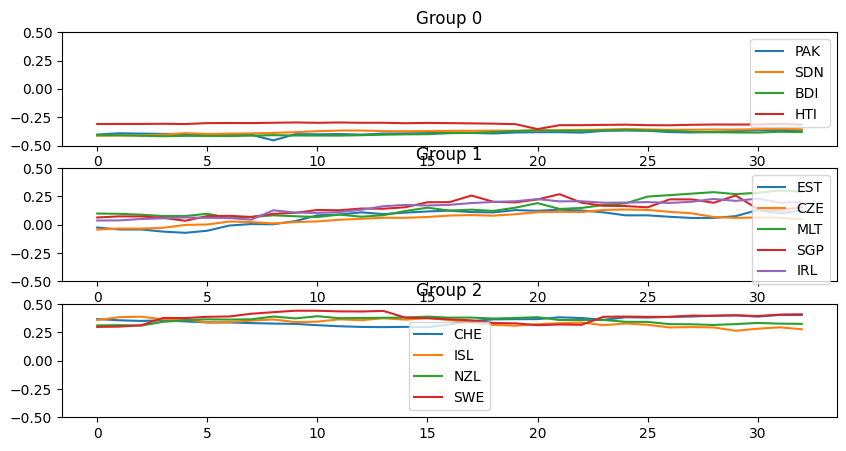

In [7]:
group0 = ["PAK", "SDN", "BDI", "HTI"]
group1 = ["EST", "CZE", "MLT", "SGP", "IRL"]
group2 = ["CHE", "ISL", "NZL", "SWE"]

# Plot the PHI values for the countries in the groups

group0_phi = phi_df.loc[group0]
group1_phi = phi_df.loc[group1]
group2_phi = phi_df.loc[group2]

plot = True

if plot:
    # plot each group on a different subplot
    fig, axs = plt.subplots(3, 1, figsize=(10, 5))
    for i in range(3):
        for j in range(1):
            if i == 0:
                group = group0_phi
            elif i == 1:
                group = group1_phi
            else:
                group = group2_phi
            group = group.drop(columns=["group"])
            names = group.index
            axs[i].set_ylim(-0.5, 0.5)
            axs[i].plot(group.T)
            axs[i].set_title(f'Group {i}')
            axs[i].legend(names)
    plt.show()

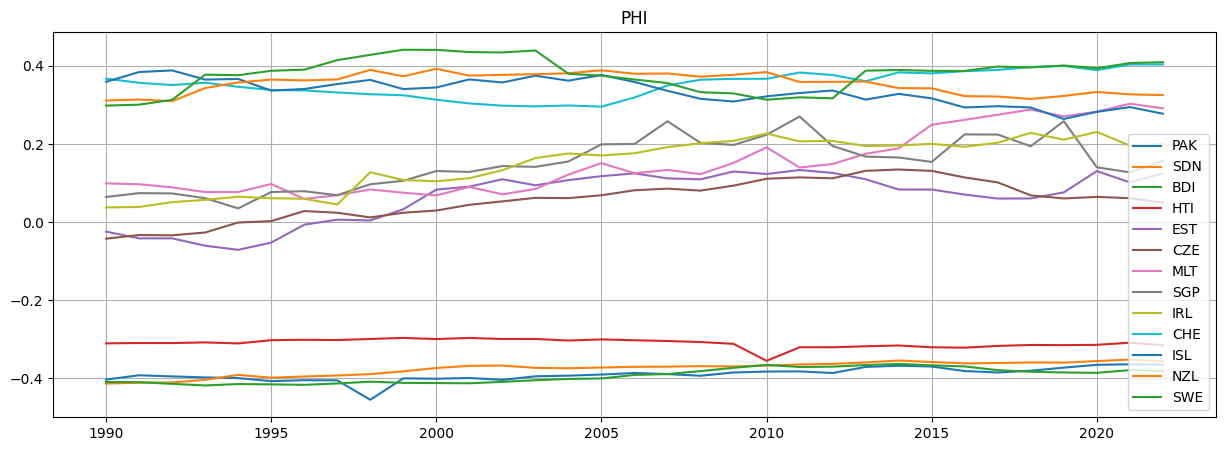

In [9]:
# Create one plot with all the groups group0, group1, group2
groups_phi = pd.concat([group0_phi, group1_phi, group2_phi])

groups_phi = groups_phi.drop(columns=["group"])

# plot groups_phi
plot_PHI(groups_phi.values, groups_phi.index , labels=True)

# 3. K-Means clustering

In [10]:
# DEFINE THE DISTANCE FUNCTION

def euclid_distance(series1, series2):
    """ 
    Compute the euclidean distance between two time series
    """
    return np.linalg.norm(series1 - series2)

def manhattan_distance(series1, series2):
    """ 
    Compute the manhattan distance between two time series
    """
    return np.sum(np.abs(series1 - series2))


def dynamic_time_warping(series1, series2):
    from fastdtw import fastdtw
    """
    Compute the dynamic time warping distance between two time series
    """
    return fastdtw(series1, series2)[0]

In [11]:
def select_prototype(series, k, random=True):
    """ 
    Select the k prototypes from the series (dataframe)
        - random: if True, the prototypes are selected randomly
        - random: if False, the prototypes are selected using the K-medoids algorithm
    """
    if random:
        return series.sample(k)
    else:
        prototypes = []
        prototypes.append(series.iloc[0])
        for i in range(1, k):
            distances = []
            for j in range(series.shape[0]):
                if series.index[j] in [p.name for p in prototypes]:
                    distances.append(0)
                else:
                    distances.append(np.min([euclid_distance(series.iloc[j], p) for p in prototypes]))
            prototypes.append(series.iloc[np.argmax(distances)])
        return pd.DataFrame(prototypes)
    

In [12]:
def kMeans(series, k, max_it=1000):
    """ 
    kMeans clustering algorithm
    - series is a dataframe with the time series that we want to cluster
    - k is the number of clusters we want to create
    """ 

    # Select k random centroids
    centroids = select_prototype(series, k, random=False)

    # Create a dictionary to store the clusters
    clusters = {i: [] for i in range(k)}

    # Create a dictionary to store the previous clusters
    old_clusters = {i: [] for i in range(k)}

    # Create a dictionary to store the distances between the centroids and the time series
    distances = {i: [] for i in range(k)}

    # Initialize the assignment of the time series to the clusters
    assignment = np.zeros(series.shape[0])

    for it in tqdm(range(max_it)):

        # Update the assignment of the time series to the clusters
        for i in range(series.shape[0]):
            distances = [euclid_distance(series.iloc[i], centroids.iloc[j]) for j in range(k)]
            assignment[i] = np.argmin(distances)

        # Update the centroids
        for i in range(k):
            centroids.iloc[i] = series[assignment == i].mean()

        # Update the clusters
        for i in range(k):
            clusters[i] = series[assignment == i]

        # Update the old clusters
        for i in range(k):
            old_clusters[i] = series[assignment == i]

    return clusters


k = 3
# Apply the kMeans algorithm to the groups_phi dataframe
results = kMeans(groups_phi, k, max_it=10)

# Print the results
for i in range(k):
    print(f"Cluster {i}: {results[i].index}")



100%|██████████| 10/10 [00:00<00:00, 192.76it/s]

Cluster 0: Index(['PAK', 'SDN', 'BDI', 'HTI'], dtype='object', name='iso3')
Cluster 1: Index(['CHE', 'ISL', 'NZL', 'SWE'], dtype='object', name='iso3')
Cluster 2: Index(['EST', 'CZE', 'MLT', 'SGP', 'IRL'], dtype='object', name='iso3')


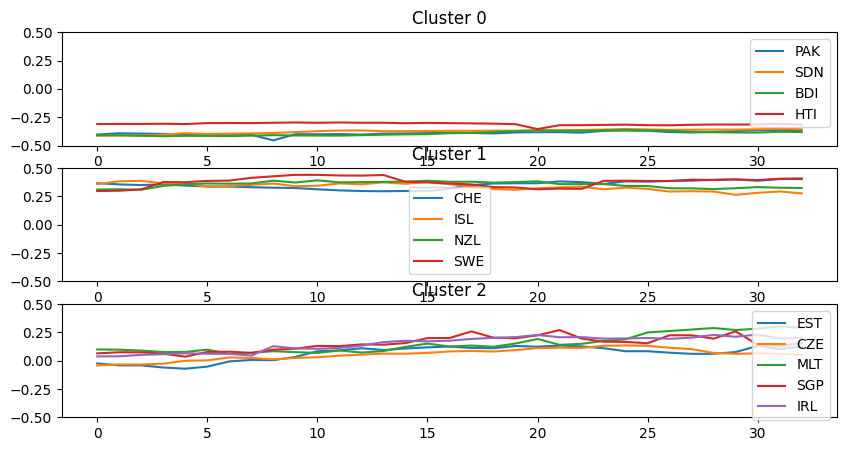

In [14]:
# Plot the results
fig, axs = plt.subplots(k, 1, figsize=(10, 5))
for i in range(k):
    group = results[i]
    names = group.index
    group = group
    axs[i].set_ylim(-0.5, 0.5)
    axs[i].plot(group.T)
    axs[i].set_title(f'Cluster {i}')
    axs[i].legend(names)
plt.show()

# 3. Apply on the whole dataset

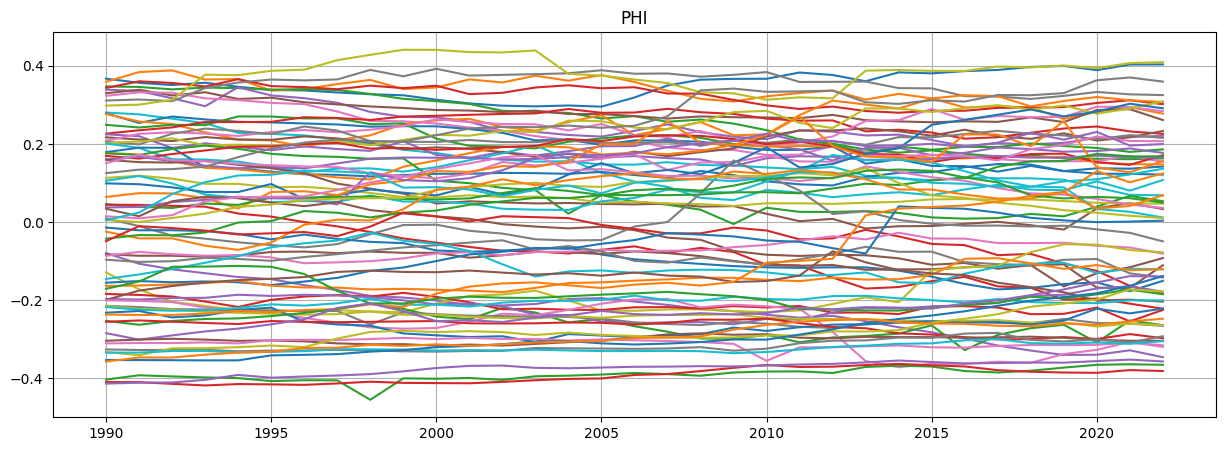

In [ ]:
phi_df = phi_df.drop(columns=["group"])
plot_PHI(phi_df.values, phi_df.index, labels=False)

In [20]:
k_tot = 5
results_phi = kMeans(phi_df, k_tot, max_it=20)

100%|██████████| 20/20 [00:00<00:00, 34.80it/s]


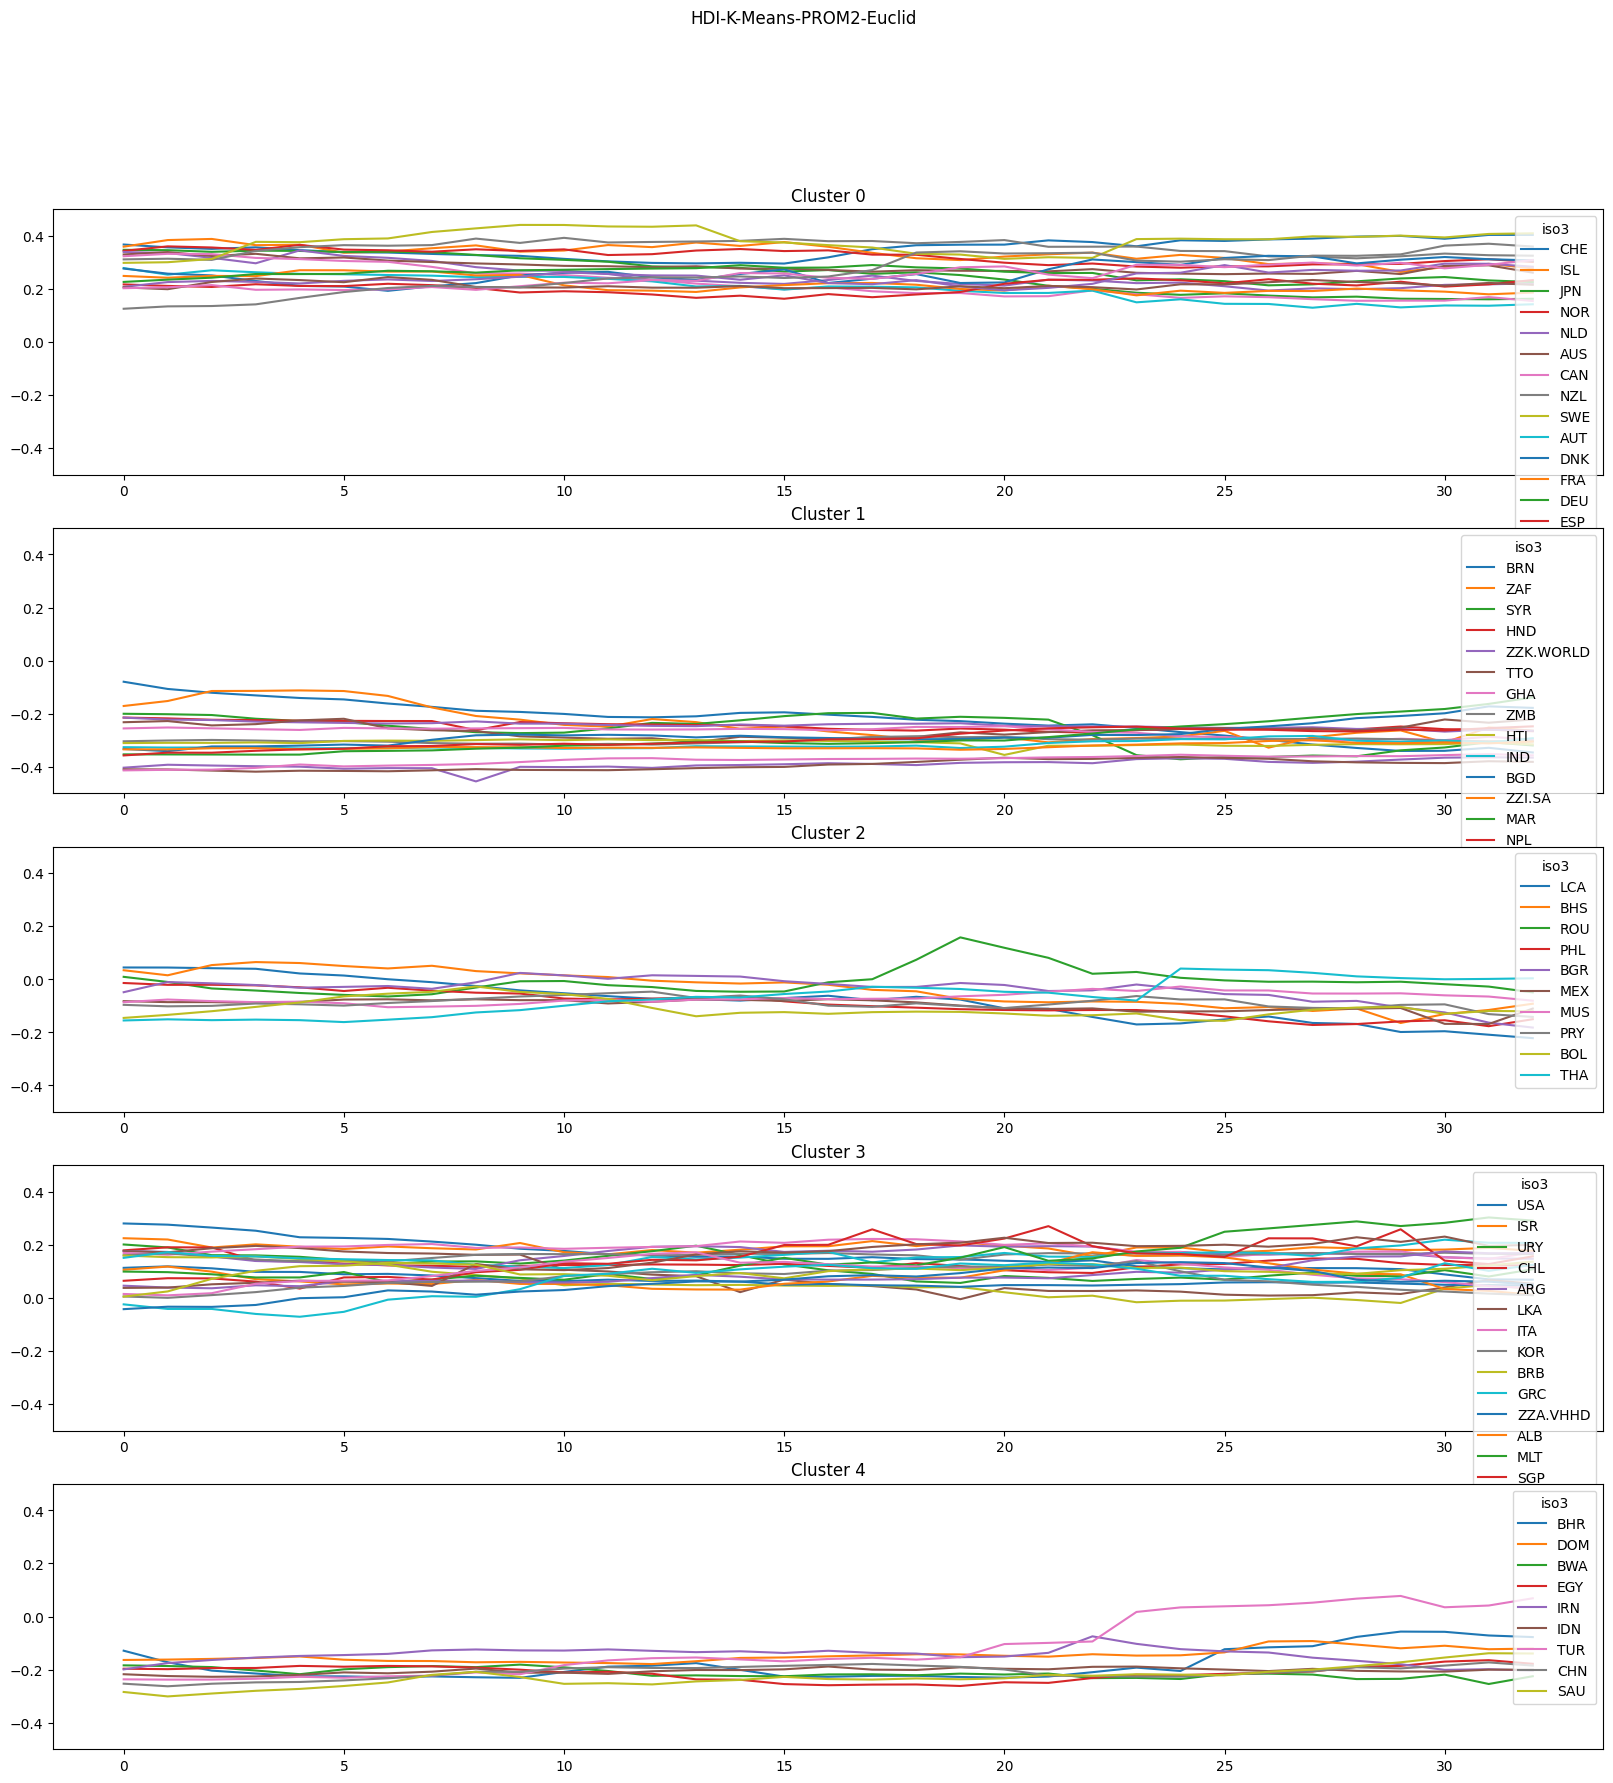

In [25]:
def plot_clusters(k, results, legends=True, title="Clusters"):
    fig, axs = plt.subplots(k, 1, figsize=(20, 20))
    for i in range(k):
        names = results[i].index
        results[i].T.plot(ax=axs[i])
        axs[i].set_title(f'Cluster {i}')
        axs[i].set_ylim(-0.5, 0.5)
        if legends:
            axs[i].legend(names)
    
    plt.suptitle(title)
    # Save the plot
    plt.savefig(f"./output/kmeans-result/{title}.png")
    plt.show()

plot_clusters(k_tot, results_phi, legends=False, title="HDI-K-Means-PROM2-Euclid")

# 4. K-means with DTW

100%|██████████| 20/20 [00:09<00:00,  2.22it/s]


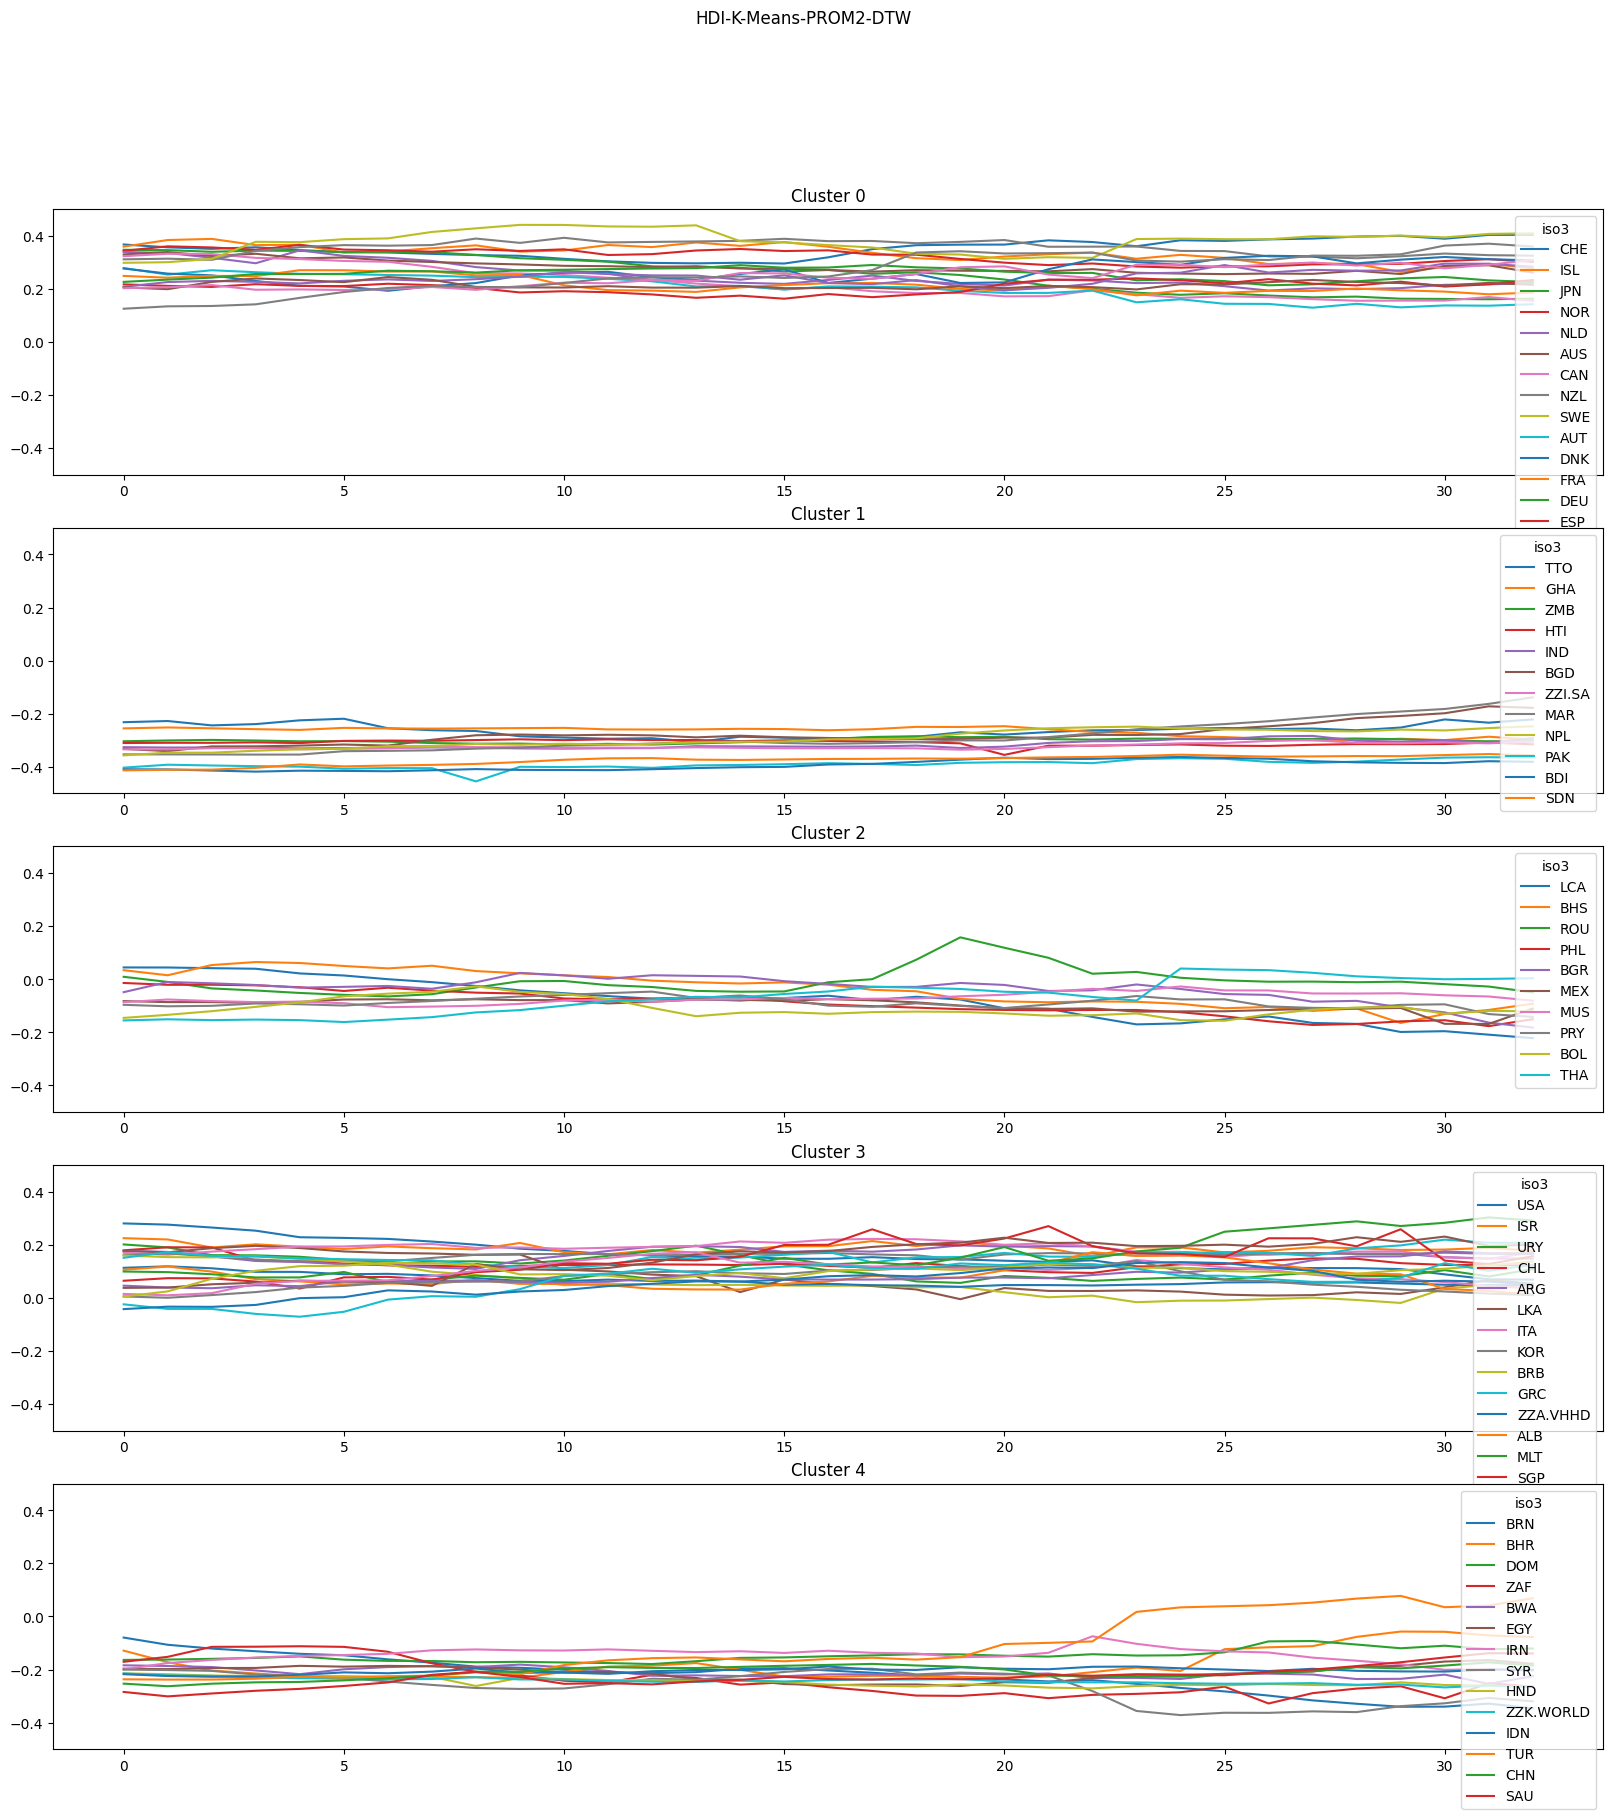

In [27]:
def kMeans_dtw(series, k, max_it=40):
    """ 
    kMeans clustering algorithm
    - series is a dataframe with the time series that we want to cluster
    - k is the number of clusters we want to create
    """ 

    # Select k random centroids
    centroids = select_prototype(series, k, random=False)

    # Create a dictionary to store the clusters
    clusters = {i: [] for i in range(k)}

    # Create a dictionary to store the previous clusters
    old_clusters = {i: [] for i in range(k)}

    # Create a dictionary to store the distances between the centroids and the time series
    distances = {i: [] for i in range(k)}

    # Initialize the assignment of the time series to the clusters
    assignment = np.zeros(series.shape[0])

    for it in tqdm(range(max_it)):

        # Update the assignment of the time series to the clusters
        for i in range(series.shape[0]):
            distances = [dynamic_time_warping(series.iloc[i], centroids.iloc[j]) for j in range(k)]
            assignment[i] = np.argmin(distances)

        # Update the centroids
        for i in range(k):
            centroids.iloc[i] = series[assignment == i].mean()

        # Update the clusters
        for i in range(k):
            clusters[i] = series[assignment == i]

        # Update the old clusters
        for i in range(k):
            old_clusters[i] = series[assignment == i]

    return clusters

results_phi_dtw = kMeans_dtw(phi_df, k_tot, max_it=20)

plot_clusters(k_tot, results_phi_dtw, legends=False, title="HDI-K-Means-PROM2-DTW")